# Contents:

    1. Define KPI's 
    2. Load and Examine Data
    3. Exploratory Analysis of KPI and Variables 
    4. Design and Apply A/B Testing Environment 
    5. Analyize Results of A/B test:
        -Use p-value to determine Statstical Significance 
        -Calculate Probabilities using Confidence Intervals 

## Import Libraries and Data

In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

df = pd.read_csv(r"C:\Users\stran\Documents\Data Science Projects\Marketing Analytics\AB Testing\ab_data.csv")

In [17]:
print(df)
df.head()

        user_id timestamp      group landing_page  converted
0        851104   11:48.6    control     old_page          0
1        804228   01:45.2    control     old_page          0
2        661590   55:06.2  treatment     new_page          0
3        853541   28:03.1  treatment     new_page          0
4        864975   52:26.2    control     old_page          1
...         ...       ...        ...          ...        ...
294473   751197   28:38.6    control     old_page          0
294474   945152   51:57.1    control     old_page          0
294475   734608   45:03.4    control     old_page          0
294476   697314   20:29.0    control     old_page          0
294477   715931   40:24.5  treatment     new_page          0

[294478 rows x 5 columns]


,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


## Establish Control and Test Groups and Design KPI Metric:

Result: Establish a KPI, in this case conversion rate 

In [18]:
#split two groups by old and new pages
df_control = df[df['group'] == 'control']
df_treat = df[df['group'] == 'treatment']

In [19]:
df_control.head()

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
4,864975,52:26.2,control,old_page,1
5,936923,20:49.1,control,old_page,0
7,719014,48:29.5,control,old_page,0


In [20]:
df_treat.head()

,user_id,timestamp,group,landing_page,converted
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
6,679687,26:46.9,treatment,new_page,1
8,817355,58:09.0,treatment,new_page,1
9,839785,11:06.6,treatment,new_page,1


## Get Summary Stats of the Control and Test Groups:

In [21]:
ab_summary = df.pivot_table(values='converted', index='group', aggfunc=np.sum)

# add additional columns to the pivot table
ab_summary['total'] = df.pivot_table(values='converted', index='group', aggfunc=lambda x: len(x))
ab_summary['rate'] = df.pivot_table(values='converted', index='group')

print(ab_summary)

           converted   total      rate
group                                 
control        17723  147202  0.120399
treatment      17514  147276  0.118920


In [22]:
ab_summary.head()

,converted,total,rate
group,,,
control,17723,147202,0.120399
treatment,17514,147276,0.118920


## Visualize the Conversion Rates of Control and Test Groups:

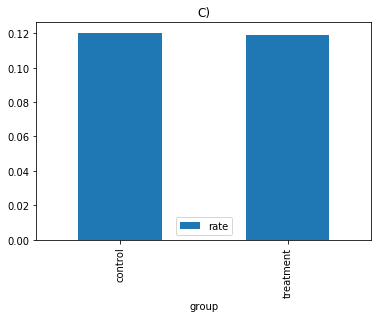

In [23]:
#ab_summary.plot.bar()
#plt.show()
#ab_summary.(kind='bar', column=['rate'])
ab_summary.plot.bar(y='rate')
#ab_summary.plot(kind='bar')
plt.title('C)')
plt.show()

In [24]:
df_control_convert = df_control[df_control['converted'] == 1].count()
df_control_length = df_control.count()
df_control_converstion_rate = (df_control_convert/df_control_length)

df_treat_convert = df_treat[df_treat['converted'] == 1].count()
df_treat_length = df_treat.count()
df_treat_converstion_rate = (df_treat_convert/df_treat_length)



print(df_treat_converstion_rate)
print(df_control_converstion_rate)


user_id         0.11892
timestamp       0.11892
group           0.11892
landing_page    0.11892
converted       0.11892
dtype: float64
user_id         0.120399
timestamp       0.120399
group           0.120399
landing_page    0.120399
converted       0.120399
dtype: float64


## Results:

    1. We see an inperceptable difference in terms of the converstion rates of the old page (Control Group) and the new page (test group), which exhibited of 12.04% and 11.89% respectively.  

## Use Descriptive Statstical Visualizations:

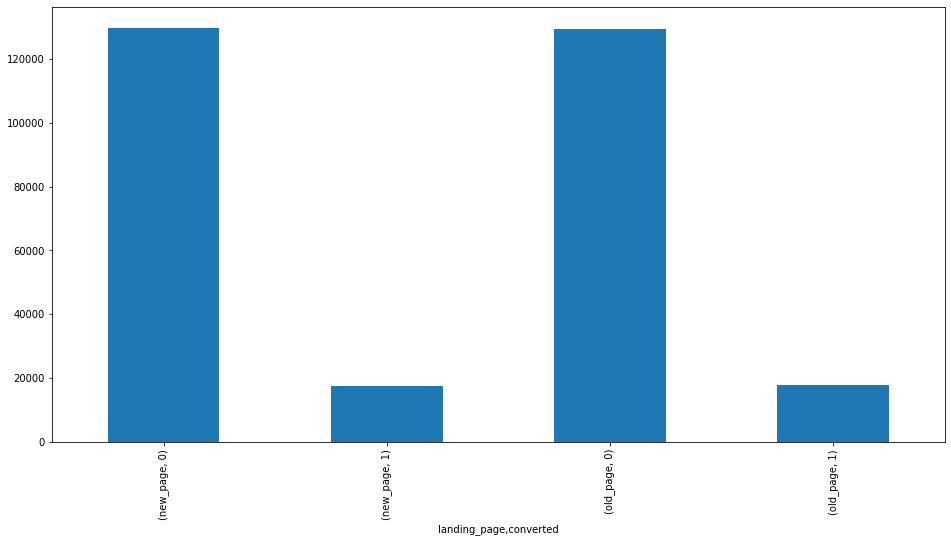

In [25]:
groups = df.groupby(['landing_page','converted']).size()
groups.plot.bar(figsize=(16,8))

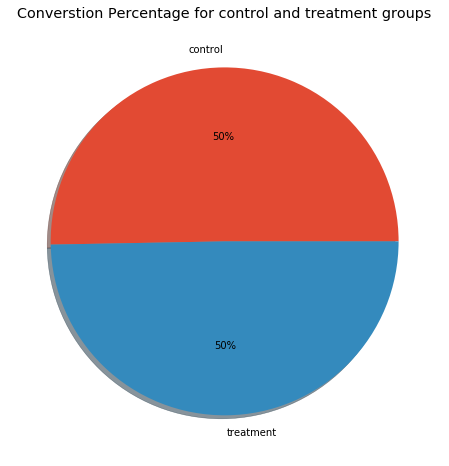

In [26]:
plt.style.use('ggplot')
ax = ab_summary.groupby('group').sum()['converted'].plot.pie(figsize=(16,8),
                                                             autopct='%1.0f%%',
                                                             shadow=True,)
ax.set_ylabel('')
ax.set_title('Converstion Percentage for control and treatment groups')
plt.show()
                                                             

In [27]:
df.groupby(['group', 'converted']).describe()

user_id                                         \
                        count           mean           std       min   
group     converted                                                    
control   0          129479.0  788221.231466  91260.088201  630002.0   
          1           17723.0  787406.164193  91415.572020  630009.0   
treatment 0          129762.0  787613.437008  91109.957707  630000.0   
          1           17514.0  789394.382380  91373.083134  630001.0   

                                                              
                           25%       50%       75%       max  
group     converted                                           
control   0          709424.00  788266.0  867161.5  945998.0  
          1          708245.50  786417.0  867004.5  945991.0  
treatment 0          708480.50  787700.0  866450.5  945999.0  
          1          710560.75  789145.5  868454.5  945989.0

In [29]:
mean_control = df.groupby(['group','converted']).mean()
std_control = df.groupby(['group', 'converted']).std()
count_control = df.groupby(['group', 'converted']).count()

print(mean_control)
print(std_control)
print(count_control)

                           user_id
group     converted               
control   0          788221.231466
          1          787406.164193
treatment 0          787613.437008
          1          789394.382380
                          user_id
group     converted              
control   0          91260.088201
          1          91415.572020
treatment 0          91109.957707
          1          91373.083134
                     user_id  timestamp  landing_page
group     converted                                  
control   0           129479     129479        129479
          1            17723      17723         17723
treatment 0           129762     129762        129762
          1            17514      17514         17514


## Results: 
    1. Out descriptive visualizations show a similar performance of the old and new pages in converting customers as seen in our pie and bar charts. 
    2. When looking at summary statstics by control and treatment groups, we see very similar summary statstics that don't provide any insights into which page is more effective at converting customers.

## Perform a T-test:
    1. Use T-test to test if the difference between our control and test groups is stastically significant. 
    2. If p-value is less than 0.05 we can determine the results are stastically signficant and we can reject the null hypothesis.

In [88]:
from scipy import stats

t, p = stats.ttest_ind(df.loc[df['group'] == 'control', 'converted'].values,
                       df.loc[df['group'] == 'treatment', 'converted'].values,
                       equal_var=False)

print('t-value = {}'.format(t))
print('p-value= {}'.format(p))

t-value = 1.2369191070650907
p-value= 0.21611810218868657


## Results:
    1. Given our p-value o f 0.216, which exceeds 0.05, we determine the results are not statstically significant and we can accept the null hypothesis.
    2. In summation, there is a small difference between the mean of the control and test group and this difference is not statstically signifcant. Consequently, there's no evidence our new email marketing campaign is more effective than our old one and vice versa.

## Perform a Chi-Squared Test for Significance:

In [89]:

# 1) Split groups into two separate DataFrames
a = df[df['group'] == 'control']
b = df[df['group'] == 'treatment']

# 2) A-click, A-noclick, B-click, B-noclick
a_click = a.converted.sum()
a_noclick = a.converted.size - b.converted.sum()
b_click = b.converted.sum()
b_noclick = b.converted.size - b.converted.sum()

# 3) Create np array
T = np.array([[a_click, a_noclick], [b_click, b_noclick]])

import scipy
from scipy import stats

print(scipy.stats.chi2_contingency(T,correction=False)[1])

0.2735425174354186
